# Hydrostatics

**Please make a copy (File -> Make a copy..) of this notebook and put your name in the title (at the top of the screen)**

We'll try to determine the displacement of a hull for different drafts. We've got two hulls to play around with. A small sailing boat (submitted by Nicholas) and a Damen FCS 3307. The [general arrangement of the sailing boat](https://damen.sharepoint.com/:b:/s/coll_PythonUserGroup/EVGmdkut4olErxYk6UBGa38B7xeiF7U8SQmQ8sc0WzwYew?e=sVoN5V) already contains a displacement, so we have something to verify our calculations with.

We'll start out by loading the lines plan and having a look at it


<IPython.core.display.Javascript object>


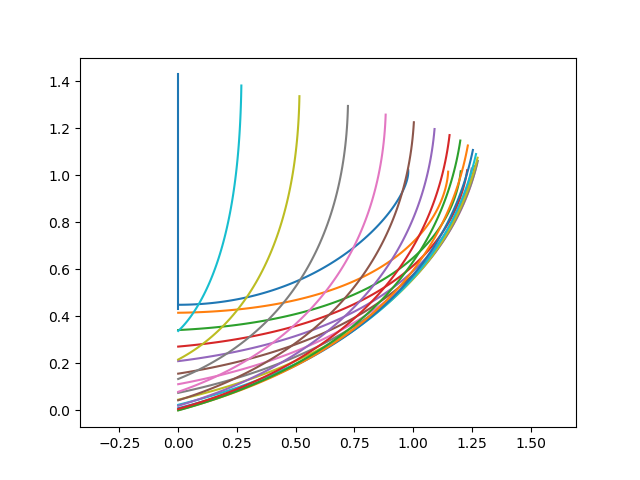

In [1]:
%matplotlib notebook
import json
from lines_plan import *

lines = load_lines_plan('./data/grendel_sailer.json')
plot_lines_plan(lines)

Or have a look at [the file](./data/grendel_sailer.json) directly...

The points that make up a station/frame in the `lines` object are stored in the `yz` field of the frame. So the data of the 3rd frame would be:

In [3]:
lines['frames'][2]['yz']

[[0.0, 0.34186],
 [0.02234, 0.34303],
 [0.04442, 0.34432],
 [0.06622, 0.34574],
 [0.08776, 0.34728],
 [0.10904, 0.34895],
 [0.13005, 0.35073],
 [0.15079, 0.35263],
 [0.17128, 0.35466],
 [0.19151, 0.35679],
 [0.21148, 0.35904],
 [0.2312, 0.36141],
 [0.25066, 0.36388],
 [0.26987, 0.36647],
 [0.28882, 0.36916],
 [0.30753, 0.37196],
 [0.32599, 0.37487],
 [0.34421, 0.37788],
 [0.36218, 0.38099],
 [0.3799, 0.38421],
 [0.39739, 0.38752],
 [0.41463, 0.39093],
 [0.43164, 0.39444],
 [0.44841, 0.39805],
 [0.46494, 0.40175],
 [0.48124, 0.40554],
 [0.49731, 0.40942],
 [0.51314, 0.41339],
 [0.52875, 0.41745],
 [0.54413, 0.4216],
 [0.55929, 0.42583],
 [0.57422, 0.43015],
 [0.58893, 0.43455],
 [0.60341, 0.43903],
 [0.61768, 0.44358],
 [0.63173, 0.44822],
 [0.64556, 0.45293],
 [0.65918, 0.45772],
 [0.67258, 0.46258],
 [0.68577, 0.46751],
 [0.69875, 0.47252],
 [0.71152, 0.47759],
 [0.72409, 0.48273],
 [0.73645, 0.48794],
 [0.74861, 0.49321],
 [0.76056, 0.49854],
 [0.77231, 0.50394],
 [0.78387, 0.50939],

## Assignment 1

Create a function 
```
def cross_section(frame, draft):
    """Evaluate submerged cross-sectional area of frame at draft.
    :param frame: List of (y, z) points starting at the base of the frame.
    :param draft: Waterline level at current frame measured from the baseline.
    :returns: Area of submerged part of the frame. 
    """
    <Your stuff here>    
```

In [30]:
from scipy.integrate import trapz

def insert_waterline_points(frame, draft):
    result = []
    prev = [0, 0]
    for coord in frame:
        prev_sub = draft - prev[1]
        new_sub = draft - coord[1]
        if prev_sub * new_sub < 0:
            dz = coord[1] - prev[1]
            dy = coord[0] - prev[0]
            if dz != 0:
                new = [prev[0] + prev_sub / dz * dy, draft]
            else:
                new = [prev[0], draft]
            result.append(new)
        result.append(coord)
    return result
                    

def cross_section(frame, draft):
    a = np.array(insert_waterline_points(frame, draft))
    a[a[:,1] > draft] = draft
    return trapz(a[:,0], a[:,1]) * 2

cross_section(lines['frames'][10]['yz'], 0.43)
    

0.43346646192631333

## Assignment 2

Create a function
```
def displacement(frames, draft):
    """Returns displaced volume of frames at draft.
    :param frames: List of frames, where a frame is a  dict('x': value, 'yz': list of (y, z) points).
    :param draft: Ship draft, measured from baseline.
    """
    <Your stuff here>    
```
If you're feeling adventurous: add a `trim` parameter to this function.

In [31]:
from scipy.integrate import simps
def displacement(frames, draft):
    xs = [ frame['x'] for frame in frames ]
    cross_sections = [ cross_section(frame['yz'], draft) for frame in frames ]
    return simps(cross_sections, xs)


displacement(lines['frames'], 0.43)    

2.2253625831650194

Now check if above function can get the 2.22 m^3 displacement volume at T= 0.43m for the sailboat.
And what about the FCS at T=1.5m ?

In [33]:
fcs_lines = load_lines_plan('./data/fcs_3307.json')
plot_lines_plan(fcs_lines)

In [34]:
displacement(fcs_lines['frames'], 1.5)

127.92295313606782